# Project 7.1: Building a Model to Predict Housing Prices

**John Kelleher**


# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This project looks at the Ames, Iowa housing dataset and creates three different models to predict sale price using multiple regression analysis. Variables considered in the analyses include Sale Price, Overall Quality, Masonry Veneer Area, Full Bath, Total Rooms Above Ground, Year Built,  Year Remodeled, Garage Area, Bedrooms Above Ground, Above Ground Living Area, Total Basement Area, Wood Deck Area, Garage Car Capacity, Garage Year Built.
Results showed that the prediction model score increased as more variables were added in the analysis.

[Back to top](#Index)


## 1. Introduction

In this project, I want to find the sale price of any given house by using other variables that describe the house in another way as predictors. I will use 10, 12, and 14 variables in three prediction models and see which model best predicts the actual Sale Price. The goal is to improve predictive performance from Dr. Williams' model in the MIT Data Engineering course.

After running all of my analyses, I found that the more the variable correlates with the sale price of the house, the better we can predict the actual sale price. I also found that the more variables used in my prediction model, the better the model score became. When I used 10 variables, my model score was 0.9235. The model score increased to 0.9554 when I added two more variables in the analysis (12 variables). The model score increased by a smaller amount when I added two more variables on top of that, totaling 14 variables, to 0.9578.


[Back to top](#Index)

## 2. The Data

The data is public housing data with 100 different houses and 82 different columns (variables) that describe some aspect of each house. For my presentation, I used data for just 20 houses to make my prediction model.

[Back to top](#Index)

### 2.1 Import the Data

The data is from the Ames, Iowa housing dataset which is used for data science education. It is based on homes sold in Ames, Iowa from 2006 to 2010.

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [131]:
data = pd.read_csv('houseSmallData.csv')
data

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,...,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
96,96,97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
97,97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
98,98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


Here are the descriptions of the variables I looked at in my prediction models.

|Variable|Description|
|:-------|:----------|
|SalePrice:|Sale price of house
|OverallQual:|Rates the overall material and finish of the house (score of 1–10)| 
|MasVnrArea:|Masonry veneer area in square feet|
|FullBath:|Full bathrooms above grade|
|TotRmsAbvGrd:|Total rooms above grade (does not include bathrooms)|
|YearBuilt:|Original construction date|
|YearRemodAdd:|Remodel date (same as construction date if no remodeling or additions)|
|GarageArea:|Size of garage in square feet|
|BedroomAbvGr:|Bedrooms above grade (does NOT include basement bedrooms)|
|GrLivArea:|Above grade (ground) living area square feet|
|TotalBsmtSF:|Total square feet of basement area|
|GarageYrBlt:|Year garage was built|
|WoodDeckSF:|Wood deck area in square feet|
|GarageCars:|Size of garage in car capacity|

[Back to top](#Index)

### 2.2 Data Exploration

I created the scatter plots below to show how the variables Overall Quality and Masonry Veneer Area correlate with Sale Price.

In [133]:
data.shape

(100, 82)

In [134]:
data.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Overall Quality and Sale Price
This scatter plot shows the relationship between Overall Quality (which is the variable most correlated with Sale Price) and Sale Price.

Text(0, 0.5, 'Sale Price ($)')

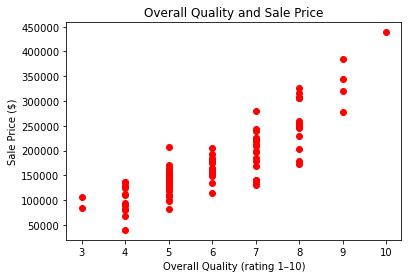

In [7]:
plt.scatter(data['OverallQual'],data['SalePrice'],color='r')
plt.title('Overall Quality and Sale Price')
plt.xlabel('Overall Quality (rating 1–10)')
plt.ylabel('Sale Price ($)')

#### Masonry Veneer Area and Sale Price
This scatter plot shows the relationship between Masonry Veneer Area (which is the second most correlated variable with Sale Price) and Sale Price.

Text(0, 0.5, 'Sale Price ($)')

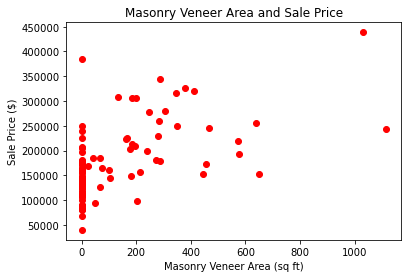

In [9]:
plt.scatter(data['MasVnrArea'],data['SalePrice'],color='r')
plt.title('Masonry Veneer Area and Sale Price')
plt.xlabel('Masonry Veneer Area (sq ft)')
plt.ylabel('Sale Price ($)')

[Back to top](#Index)

### 2.3 Data Preparation

I used just the first 20 records in the housing data set. I also removed nonnumeric data and used interpolation to fill in missing (null) values. 


In [135]:
train = data.iloc[0:20,:]
train.shape

(20, 82)

In [136]:
train.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
# Investigate sale price
train['SalePrice']

0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
15    132000
16    149000
17     90000
18    159000
19    139000
Name: SalePrice, dtype: int64

Below is a graph displaying the distribution of sale price data among the 20 houses. 


(array([1., 6., 5., 1., 2., 1., 1., 1., 1., 1.]),
 array([ 90000., 115500., 141000., 166500., 192000., 217500., 243000.,
        268500., 294000., 319500., 345000.]),
 <BarContainer object of 10 artists>)

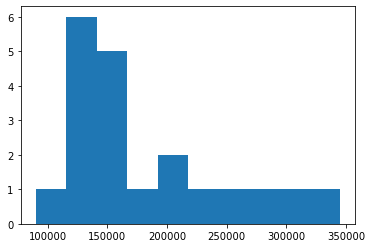

In [34]:
plt.hist(train['SalePrice'])

In [137]:
# Select numeric columns - now there are only 40 columns, 42 nonnumeric columns were eliminated
numeric = train.select_dtypes(include=[np.number])
numeric.shape

(20, 40)

In [138]:
nulls = numeric.isnull().sum().sort_values(ascending=False)[0:5]
nulls

PoolQC          20
LotFrontage      4
Unnamed: 0       0
OpenPorchSF      0
KitchenAbvGr     0
dtype: int64

In [140]:
# Eliminate null values
numeric = numeric.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)
sum(numeric.isnull().sum() != 0)

0

Below is the new dataframe after cleaning the data. Now there are 39 columns left in the dataframe.

In [153]:
numeric

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,...,0,61,0,0,0,0,0,2,2008,208500
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,...,298,0,0,0,0,0,0,5,2007,181500
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,...,0,42,0,0,0,0,0,9,2008,223500
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,...,0,35,272,0,0,0,0,2,2006,140000
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,...,192,84,0,0,0,0,0,12,2008,250000
5,5,6,50,85.0,14115,5,5,1993,1995,0.0,...,40,30,0,320,0,0,700,10,2009,143000
6,6,7,20,75.0,10084,8,5,2004,2005,186.0,...,255,57,0,0,0,0,0,8,2007,307000
7,7,8,60,63.0,10382,7,6,1973,1973,240.0,...,235,204,228,0,0,0,350,11,2009,200000
8,8,9,50,51.0,6120,7,5,1931,1950,0.0,...,90,0,205,0,0,0,0,4,2008,129900
9,9,10,190,50.0,7420,5,6,1939,1950,0.0,...,0,4,0,0,0,0,0,1,2008,118000


In [141]:
numeric.shape

(20, 39)

In [41]:
salePrice = numeric['SalePrice']
salePrice.describe()

count        20.000000
mean     181270.000000
std       68215.603247
min       90000.000000
25%      137250.000000
50%      153000.000000
75%      212250.000000
max      345000.000000
Name: SalePrice, dtype: float64

[Back to top](#Index)

### 2.4 Correlation


Here are the top 15 variables correlated with SalePrice in decreasing order. I am basing my model on the strength of the correlations, including the top 10, 12, and 14 variables in this list.

In [42]:
# Find correlations
corr = numeric.corr()
corr.shape

(39, 39)

In [43]:
# Find out what is most correlated with SalePrice
cols = corr['SalePrice'].sort_values(ascending=False)[0:15]
cols

SalePrice       1.000000
OverallQual     0.807380
MasVnrArea      0.788274
FullBath        0.721954
TotRmsAbvGrd    0.699634
YearBuilt       0.699627
YearRemodAdd    0.698731
GarageArea      0.696998
BedroomAbvGr    0.681291
GrLivArea       0.676909
TotalBsmtSF     0.651318
GarageYrBlt     0.649557
WoodDeckSF      0.575730
GarageCars      0.571377
LotFrontage     0.513583
Name: SalePrice, dtype: float64

Here is a pair plot displaying the correlations between Sale Price, Masonry Veneer Area, Garage Area, and Above Ground Living Area.

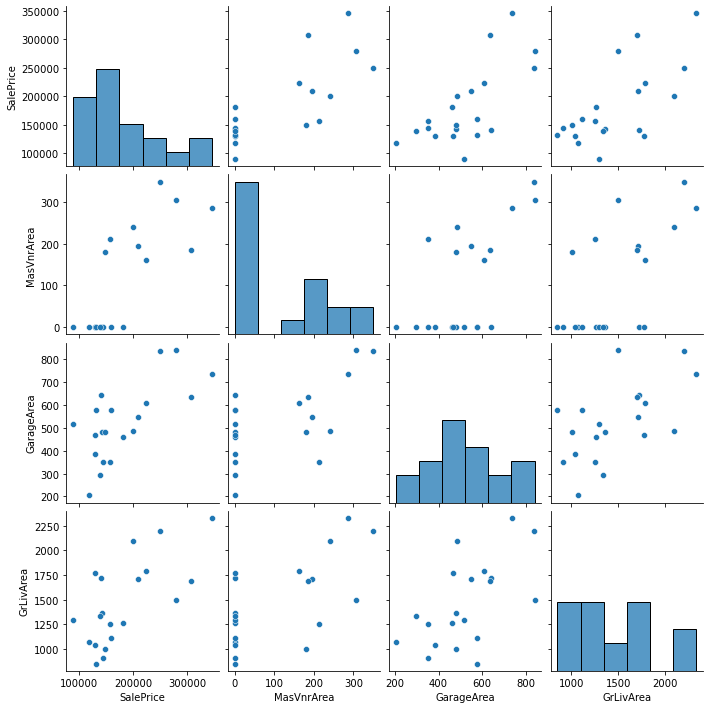

In [159]:
snsplt = sns.pairplot(train, vars=['SalePrice', 'MasVnrArea', 'GarageArea', 'GrLivArea'])
snsplt


[Back to top](#Index)

## 3. Project Description

I used more variables than Dr. Williams in each of my prediction models to achieve a better model score than his model. My models included the same variables that were in Dr. Williams' model plus additional variables. I observed that the more variables I used, the more accurate my predictive model became. 


[Back to top](#Index)

### 3.1 Linear Regression

I used multiple linear regression to analyze the data. This algorithm is suitable for this project because it finds the best possible predictive model based on the training data. I ran three prediction models, with 10, 12, and 14 variables, respectively.

I did my analysis using the linear regression model from the sklearn library. That model uses the ordinary least squares Linear Regression algorithm. That model calculates the sum of the squared distances of each point from the line and finds the line of best fit. In other words, it finds the line with the smallest sum. For multiple linear regressiion, it finds the "plane" of best fit.

[Back to top](#Index)

### 3.2 Analysis 

I used more variables than Dr. Williams in each of my prediction models to achieve a better model score than his model. My models included the same variables that were in Dr. Williams' model plus additional variables. I observed that the more variables I used, the more accurate my predictive model became. 

Model 1 variables: SalePrice, OverallQual, MasVnrArea, FullBath, TotRmsAbvGrd, YearBuilt,  YearRemodAdd, GarageArea, BedroomAbvGr, GrLivArea

Model 2 variables: SalePrice, OverallQual, MasVnrArea, FullBath, TotRmsAbvGrd, YearBuilt,  YearRemodAdd, GarageArea, BedroomAbvGr, GrLivArea, TotalBsmtSF, GarageYrBlt

Model 3 variables: SalePrice, OverallQual, MasVnrArea, FullBath, TotRmsAbvGrd, YearBuilt,  YearRemodAdd, GarageArea, BedroomAbvGr, GrLivArea, TotalBsmtSF, WoodDeckSF, GarageCarsGarageYrBlt

### Model 1
Below are the steps for model 1. The predictive model score was 0.9235.

In [167]:
# Choosing top ten variables that correlate with SalePrice
# Here is my first prediction model using the top ten variable that correlate with SalePrice
cols = corr['SalePrice'].sort_values(ascending=False)[0:10].index
cols

Index(['SalePrice', 'OverallQual', 'MasVnrArea', 'FullBath', 'TotRmsAbvGrd',
       'YearBuilt', 'YearRemodAdd', 'GarageArea', 'BedroomAbvGr', 'GrLivArea'],
      dtype='object')

In [168]:
# Pick out X columns and Y = SalePrice
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,MasVnrArea,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageArea,BedroomAbvGr,GrLivArea
0,7,196.0,2,8,2003,2003,548,3,1710
1,6,0.0,2,6,1976,1976,460,3,1262
2,7,162.0,2,6,2001,2002,608,3,1786
3,7,0.0,1,7,1915,1970,642,3,1717
4,8,350.0,2,9,2000,2000,836,4,2198
5,5,0.0,1,5,1993,1995,480,1,1362
6,8,186.0,2,7,2004,2005,636,3,1694
7,7,240.0,2,7,1973,1973,484,3,2090
8,7,0.0,2,8,1931,1950,468,2,1774
9,5,0.0,1,5,1939,1950,205,2,1077


In [145]:
Y

0     208500
1     181500
2     223500
3     140000
4     250000
5     143000
6     307000
7     200000
8     129900
9     118000
10    129500
11    345000
12    144000
13    279500
14    157000
15    132000
16    149000
17     90000
18    159000
19    139000
Name: SalePrice, dtype: int64

In [169]:
# Build Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)

In [170]:
# How good is the model
model.score(X,Y)

0.923533288395583

Text(0, 0.5, 'Actual Sale Price ($)')

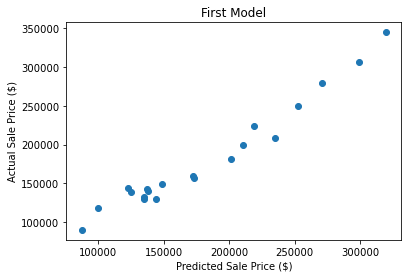

In [154]:
plt.scatter(predictions, Y)
plt.title('First Model')
plt.xlabel('Predicted Sale Price ($)')
plt.ylabel('Actual Sale Price ($)')

### Model 2
Below are the steps for model 2. The predictive model score was 0.9554.

In [172]:
# Here is my second prediction model, this time I used the top 12 variables that correlate
# The model score increased by over .03
cols = corr['SalePrice'].sort_values(ascending=False)[0:12].index
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)
model.score(X,Y)

0.9553695571480916

Text(0, 0.5, 'Actual Sale Price ($)')

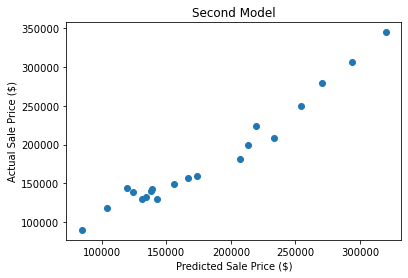

In [156]:
plt.scatter(predictions, Y)
plt.title('Second Model')
plt.xlabel('Predicted Sale Price ($)')
plt.ylabel('Actual Sale Price ($)')

### Model 3
Below are the steps for model 3. The predictive model score was 0.9578.

In [174]:
# Here is my third prediction model, this time I used the top 14 variables that correlate
# The model score increased again, but only by an extremely small amount this time
cols = corr['SalePrice'].sort_values(ascending=False)[0:14].index
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)
model.score(X,Y)

0.9578308222698887

Text(0, 0.5, 'Actual Sale Price ($)')

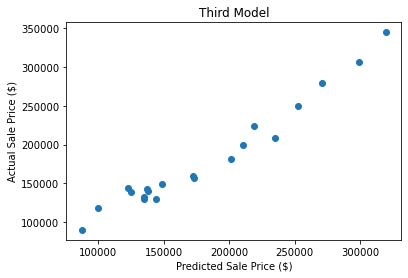

In [158]:
plt.scatter(predictions, Y)
plt.title('Third Model')
plt.xlabel('Predicted Sale Price ($)')
plt.ylabel('Actual Sale Price ($)')

[Back to top](#Index)

### 3.3 Results

The results appear as though the more variables that I used in my prediction model, the better the model score was. My model scores increased, but it seems as though once the score reached 0.95, it stopped increasing by a signifant amount. A possible explanation is that this is about the best predictive score possible.



[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

I verified my model against the test data located in the file `jtest.csv`.

The model performance on the test data improved as the number of variables increased, however, the model performance on the test data was not as good as on the training data. A possible explanation for this is that I only used 20 records for the training data.

Model 1 score: 0.2509

Model 2 score: 0.3352

Model 3 score: 0.3390

In [160]:
test = pd.read_csv('jtest.csv')
test.shape

(100, 82)

In [161]:
test = test.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)
sum(test.isnull().sum() != 0)

0

In [163]:
test.shape

(100, 38)

In [171]:
# First model against test data
X = test[cols]
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
predictions = model.predict(X)
print(f"R^2 is: {model.score(X,Y)}")

R^2 is: 0.2509302945485


In [173]:
# Second model against test data
X = test[cols]
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
predictions = model.predict(X)
print(f"R^2 is: {model.score(X,Y)}")

R^2 is: 0.33523481386610554


In [175]:
# Third model against test data
X = test[cols]
Y = X['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
predictions = model.predict(X)
print(f"R^2 is: {model.score(X,Y)}")

R^2 is: 0.3389947796506252


[Back to top](#Index)

## Conclusion

The more variables I used, the better my prediction model became. The variables that correlated most with Sale Price were the ones that improved the model score the most. Another conclusion is that using a larger sample size than 20 houses would probably have improved predictive accuracy on the test data.

My conclusions are that generally speaking, it is best to choose the variables that best correlate with another variable to create a prediction model. The more variables we have, the better we can predict the actual value of the variable we are interested in.




[Back to top](#Index
)
## References


- Kihn, Martin. "Data Analysis on the Ames Housing Dataset." Data Science Blog, 2021. https://nycdatascience.com/blog/student-works/data-analysis-on-the-ames-housing-dataset/ .

- scikit-learn developers. "sklearn.linear_model.LinearRegression." scikit-learn.org, 2022. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html .

